### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

### Importing Dataset

In [3]:
cardf = pd.read_csv(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\car_df_EDA.csv")

In [4]:
cardf.head()

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450


In [5]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       208 non-null    int64  
 1   Unnamed: 0         208 non-null    int64  
 2   make               208 non-null    object 
 3   fuel_type          208 non-null    object 
 4   aspiration         208 non-null    object 
 5   num_of_doors       208 non-null    object 
 6   body_style         208 non-null    object 
 7   drive_wheels       208 non-null    object 
 8   engine_location    208 non-null    object 
 9   wheel_base         206 non-null    float64
 10  length             208 non-null    float64
 11  width              208 non-null    float64
 12  height             208 non-null    float64
 13  curb_weight        208 non-null    int64  
 14  engine_type        207 non-null    object 
 15  num_of_cylinders   208 non-null    object 
 16  engine_size        206 non

In [6]:
desc = open(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\data_description.txt",'r')

In [7]:
print(desc.read())

1. `Unnamed: 0.1`: An unnamed or index column, possibly used for row identification.
2. `Unnamed: 0`: Another unnamed or index column, which may also serve for row identification.
3. `make`: The brand or manufacturer of the vehicle.
4. `fuel_type`: The type of fuel the vehicle uses (e.g., gasoline, diesel, etc.).
5. `aspiration`: Indicates whether the engine has a turbocharger or is naturally aspirated.
6. `num_of_doors`: The number of doors on the vehicle (e.g., two doors, four doors).
7. `body_style`: Describes the body style of the vehicle (e.g., sedan, coupe, hatchback).
8. `drive_wheels`: Specifies the type of drive wheels (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).
9. `engine_location`: Indicates where the engine is located in the vehicle (e.g., front, rear).
10. `wheel_base`: The distance between the front and rear axles of the vehicle.
11. `length`: The length of the vehicle.
12. `width`: The width of the vehicle.
13. `height`: The height of the vehicle.
14. `

## Data Cleaning

### Structural Errors

In [8]:
cardf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [9]:
cardf.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace=True)

In [10]:
for i in cardf.columns:
    print(i)
    print(cardf[i].dtype)
    print(cardf[i].unique())
    print("")

make
object
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel_type
object
['gas' 'diesel']

aspiration
object
['std' 'turbo']

num_of_doors
object
['two' 'four' '?']

body_style
object
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive_wheels
object
['rwd' 'fwd' '4wd']

engine_location
object
['front' 'rear']

wheel_base
float64
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2   nan 103.5 110.   88.4  93.7
 103.3  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9
 106.7 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3
  99.2 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7
 102.4 102.9 104.5  97.3 104.3 109.1]

length
float64
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.

In [11]:
def ndoor(x):
    if x == 'two':
        return 2
    elif x == 'four':
        return 4
    else:
        return np.nan

In [12]:
cardf['num_of_doors'] = cardf['num_of_doors'].apply(ndoor)
cardf['num_of_doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
203    4.0
204    4.0
205    4.0
206    4.0
207    4.0
Name: num_of_doors, Length: 208, dtype: float64

In [13]:
def ncyl (x):
    if x == 'two':
        return 2
    elif x == 'three':
        return 3
    elif x == 'four':
        return 4
    elif x == 'five':
        return 5
    elif x == 'six':
        return 6
    elif x == 'eight':
        return 8
    elif x == 'twelve':
        return 12
    else:
        return x

In [14]:
cardf['num_of_cylinders'] = cardf['num_of_cylinders'].apply(ncyl)

In [15]:
cardf['num_of_cylinders'].astype('int8')

0      4
1      4
2      6
3      4
4      5
      ..
203    6
204    4
205    6
206    6
207    4
Name: num_of_cylinders, Length: 208, dtype: int8

In [16]:
def hp(x):
    if str(x).isnumeric():
        return int(x)
    else:
        return np.nan

In [17]:
cardf['horsepower'] = cardf['horsepower'].apply(hp)

In [18]:
cardf['peak_rpm'] = cardf['peak_rpm'].apply(hp)

In [19]:
cardf['price'] = cardf['price'].apply(hp)

In [20]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               208 non-null    object 
 1   fuel_type          208 non-null    object 
 2   aspiration         208 non-null    object 
 3   num_of_doors       206 non-null    float64
 4   body_style         208 non-null    object 
 5   drive_wheels       208 non-null    object 
 6   engine_location    208 non-null    object 
 7   wheel_base         206 non-null    float64
 8   length             208 non-null    float64
 9   width              208 non-null    float64
 10  height             208 non-null    float64
 11  curb_weight        208 non-null    int64  
 12  engine_type        207 non-null    object 
 13  num_of_cylinders   208 non-null    int64  
 14  engine_size        206 non-null    float64
 15  fuel_system        208 non-null    object 
 16  compression_ratio  208 non

In [21]:
#all the columns are in desired type and the memory usage has also reduced

### Removing Duplicate rows

In [22]:
cardf.duplicated().sum()

3

In [23]:
cardf.drop_duplicates(keep = 'first', inplace=True)

In [24]:
cardf.duplicated().sum()

0

### Missing Values

In [25]:
cardf.isna().sum()  #missing values

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [26]:
cardf[cardf['num_of_doors'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.6,102.0,5500.0,24,30,8558.0
63,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,...,ohc,4,122.0,idi,22.7,64.0,4650.0,36,42,10795.0


In [27]:
cardf[cardf['make'] == 'dodge']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
21,dodge,gas,std,2.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.41,68.0,5500.0,37,41,5572.0
22,dodge,gas,std,2.0,hatchback,fwd,front,NaN,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6377.0
23,dodge,gas,turbo,2.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.60,102.0,5500.0,24,30,7957.0
24,dodge,gas,std,4.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6229.0
25,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6692.0
26,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,7609.0
27,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.60,102.0,5500.0,24,30,8558.0
28,dodge,gas,std,4.0,wagon,fwd,front,103.3,174.6,64.6,...,ohc,4,122.0,2bbl,8.50,88.0,5000.0,24,30,8921.0
29,dodge,gas,turbo,2.0,hatchback,fwd,front,95.9,173.2,66.3,...,ohc,4,156.0,mfi,7.00,145.0,5000.0,19,24,12964.0


In [28]:
cardf[cardf['make'] == 'dodge']['num_of_doors'].mode()

0    2.0
1    4.0
Name: num_of_doors, dtype: float64

In [29]:
cardf[cardf['make'] == 'mazda']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,30,31,5195.0
51,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,31,38,6095.0
52,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,31,38,6795.0
53,mazda,gas,std,4.0,sedan,fwd,front,93.1,166.8,64.2,...,ohc,4,NaN,2bbl,9.0,68.0,5000.0,31,38,6695.0
54,mazda,gas,std,4.0,sedan,fwd,front,93.1,166.8,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,31,38,7395.0
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,70.0,4bbl,9.4,101.0,6000.0,17,23,10945.0
56,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,70.0,4bbl,9.4,101.0,6000.0,17,23,11845.0
57,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,70.0,4bbl,9.4,101.0,6000.0,17,23,13645.0
58,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,80.0,mpfi,9.4,135.0,6000.0,16,23,15645.0
59,mazda,gas,std,2.0,hatchback,fwd,front,98.8,177.8,66.5,...,ohc,4,122.0,2bbl,8.6,84.0,4800.0,26,32,8845.0


In [30]:
cardf[cardf['make'] == 'mazda']['num_of_doors'].mode()

0    2.0
Name: num_of_doors, dtype: float64

In [31]:
cardf['num_of_doors'].fillna(2, inplace=True)

In [32]:
cardf['num_of_doors'].isna().sum()

0

<Axes: >

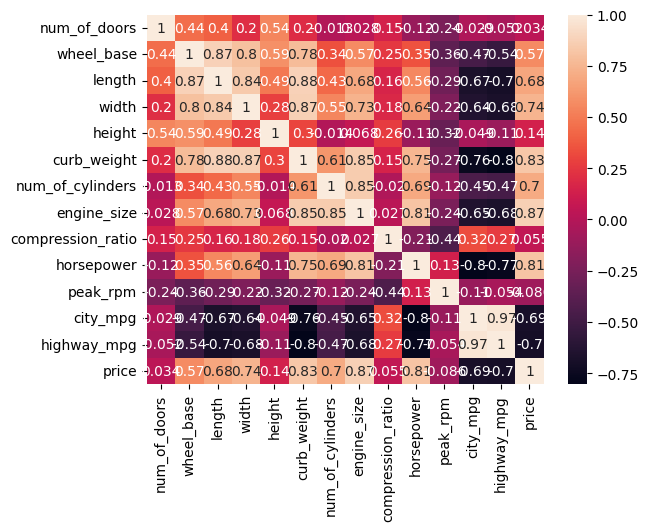

In [33]:
sns.heatmap(cardf.corr(numeric_only=True), annot = True)

In [34]:
cardf['wheel_base'].isna().sum()

2

In [35]:
cardf.corr(numeric_only=True)

,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
num_of_doors,1.000000,0.443565,0.395114,0.204211,0.544419,0.199279,-0.012526,0.027644,0.146567,-0.117879,-0.238838,-0.028621,-0.052365,0.034097
wheel_base,0.443565,1.000000,0.874483,0.796236,0.587433,0.776718,0.339685,0.567096,0.250310,0.350133,-0.363700,-0.468125,-0.541953,0.566476
length,0.395114,0.874483,1.000000,0.841118,0.491029,0.877728,0.430672,0.683215,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.680342
width,0.204211,0.796236,0.841118,1.000000,0.279210,0.867032,0.545007,0.734375,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.744780
height,0.544419,0.587433,0.491029,0.279210,1.000000,0.295572,-0.013995,0.068274,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.136406
curb_weight,0.199279,0.776718,0.877728,0.867032,0.295572,1.000000,0.609727,0.849914,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.828808
num_of_cylinders,-0.012526,0.339685,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846241,-0.020002,0.691633,-0.124434,-0.445837,-0.466666,0.703338
engine_size,0.027644,0.567096,0.683215,0.734375,0.068274,0.849914,0.846241,1.000000,0.027238,0.809867,-0.244679,-0.652188,-0.675874,0.868747
compression_ratio,0.146567,0.250310,0.158414,0.181129,0.261214,0.151362,-0.020002,0.027238,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.055303
horsepower,-0.117879,0.350133,0.555003,0.642482,-0.110711,0.751034,0.691633,0.809867,-0.205874,1.000000,0.130971,-0.803620,-0.770908,0.809963


<Axes: xlabel='wheel_base', ylabel='length'>

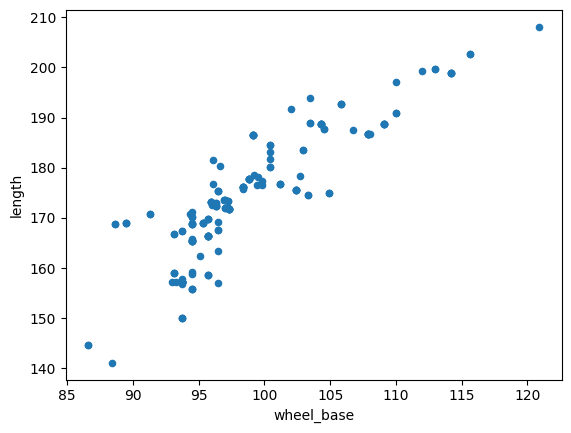

In [36]:
cardf.plot('wheel_base', 'length', kind = 'scatter')

In [37]:
cardf[cardf['wheel_base'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
11,bmw,gas,std,4.0,sedan,rwd,front,NaN,176.8,64.8,...,ohc,4,108.0,mpfi,8.8,101.0,5800.0,23,29,16925.0
22,dodge,gas,std,2.0,hatchback,fwd,front,NaN,157.3,63.8,...,ohc,4,90.0,2bbl,9.4,68.0,5500.0,31,38,6377.0


In [38]:
cardf[cardf['length']==176.8]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
10,bmw,gas,std,2.0,sedan,rwd,front,101.2,176.8,64.8,...,ohc,4,108.0,mpfi,8.8,101.0,5800.0,23,29,16430.0
11,bmw,gas,std,4.0,sedan,rwd,front,NaN,176.8,64.8,...,ohc,4,108.0,mpfi,8.8,101.0,5800.0,23,29,16925.0
12,bmw,gas,std,2.0,sedan,rwd,front,101.2,176.8,64.8,...,ohc,6,164.0,mpfi,9.0,121.0,4250.0,21,28,20970.0
13,bmw,gas,std,4.0,sedan,rwd,front,101.2,176.8,64.8,...,ohc,6,164.0,mpfi,9.0,121.0,4250.0,21,28,21105.0
131,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9895.0


In [39]:
cardf[cardf['length']==176.8]['wheel_base'].mode()

0    101.2
Name: wheel_base, dtype: float64

In [40]:
cardf.at[11, 'wheel_base'] = cardf[cardf['length']==176.8]['wheel_base'].mode()[0]

In [41]:
cardf[cardf['length']==157.3]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
21,dodge,gas,std,2.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.41,68.0,5500.0,37,41,5572.0
22,dodge,gas,std,2.0,hatchback,fwd,front,NaN,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6377.0
23,dodge,gas,turbo,2.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.60,102.0,5500.0,24,30,7957.0
24,dodge,gas,std,4.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6229.0
25,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6692.0
26,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,7609.0
27,dodge,gas,turbo,2.0,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.60,102.0,5500.0,24,30,8558.0
76,mitsubishi,gas,std,2.0,hatchback,fwd,front,93.7,157.3,64.4,...,ohc,4,92.0,2bbl,9.40,68.0,5500.0,37,41,5389.0
77,mitsubishi,gas,std,2.0,hatchback,fwd,front,93.7,157.3,64.4,...,ohc,4,92.0,2bbl,9.40,68.0,5500.0,31,38,6189.0
78,mitsubishi,gas,std,2.0,hatchback,fwd,front,93.7,157.3,64.4,...,ohc,4,92.0,2bbl,9.40,68.0,5500.0,31,38,6669.0


In [42]:
cardf[cardf['length']==157.3]['wheel_base'].mean()

93.6214285714286

In [43]:
cardf.at[22, 'wheel_base'] = cardf[cardf['length']==157.3]['wheel_base'].mean()

In [44]:
cardf['wheel_base'].isna().sum()

0

In [45]:
cardf['engine_type'].isna().sum()

1

In [46]:
cardf[cardf['engine_type'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
88,mitsubishi,gas,std,4.0,sedan,fwd,front,96.3,172.4,65.4,...,NaN,4,110.0,spdi,7.5,116.0,5500.0,23,30,9279.0


In [49]:
cardf['engine_type'].bfill(inplace =True)

In [50]:
cardf['engine_type'].isna().sum()

0

In [60]:
cardf['engine_size'].isna().sum()

2

In [61]:
cardf[cardf['engine_size'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
39,honda,gas,std,4.0,sedan,fwd,front,96.5,175.4,65.2,...,ohc,4,NaN,1bbl,9.0,86.0,5800.0,27,33,8845.0
53,mazda,gas,std,4.0,sedan,fwd,front,93.1,166.8,64.2,...,ohc,4,NaN,2bbl,9.0,68.0,5000.0,31,38,6695.0


In [62]:
cardf['engine_size'].fillna(cardf['engine_size'].median(), inplace=True)

In [63]:
cardf['engine_size'].isna().sum()

0

In [64]:
cardf['horsepower'].isna().sum()

2

In [65]:
cardf[cardf['horsepower'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9295.0
131,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9895.0


In [66]:
cardf[cardf['make'] == 'renault']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9295.0
131,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9895.0


In [67]:
cardf['horsepower'].median()

95.0

In [68]:
cardf['horsepower'].fillna(cardf['horsepower'].median(), inplace=True)

In [69]:
cardf['horsepower'].isna().sum()

0

In [70]:
cardf['peak_rpm'].isna().sum()

2

In [71]:
cardf['peak_rpm'].fillna(cardf['peak_rpm'].median(), inplace=True)

In [72]:
cardf['peak_rpm'].isna().sum()

0

In [73]:
cardf['price'].isna().sum()

7

In [74]:
cardf[cardf['price'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,...,ohc,5,131.0,mpfi,7.0,160.0,5500.0,16,22,NaN
44,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
45,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
47,jaguar,gas,std,4.0,sedan,rwd,front,113.0,199.6,69.6,...,dohc,6,258.0,mpfi,8.1,176.0,4750.0,15,19,NaN
112,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,NaN
129,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,...,dohcv,8,203.0,mpfi,10.0,288.0,5750.0,17,28,NaN
203,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohc,6,145.0,idi,23.0,106.0,4800.0,26,27,NaN


In [75]:
cond1 = (cardf['make'] == 'audi') & (cardf['num_of_doors'] == 2) & (cardf['fuel_system'] == 'mpfi')

In [76]:
cardf[cond1]['price']

5    15250.0
9        NaN
Name: price, dtype: float64

In [77]:
cardf.at[9, 'price']  = 15250.0

In [78]:
cardf[cond1]['price']

5    15250.0
9    15250.0
Name: price, dtype: float64

In [79]:
cardf[cardf['make'] == 'isuzu']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
43,isuzu,gas,std,4.0,sedan,rwd,front,94.3,170.7,61.8,...,ohc,4,111.0,2bbl,8.5,78.0,4800.0,24,29,6785.0
44,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
45,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
46,isuzu,gas,std,2.0,hatchback,rwd,front,96.0,172.6,65.2,...,ohc,4,119.0,spfi,9.2,90.0,5000.0,24,29,11048.0


In [80]:
cond2 = (cardf['make'] == 'isuzu') & (cardf['body_style'] == 'sedan') & (cardf['fuel_system'] == '2bbl')

In [81]:
cardf[cond2]['price']

43    6785.0
44       NaN
45       NaN
Name: price, dtype: float64

In [82]:
cardf.loc[44:45, 'price'] = cardf[cond2]['price'][43]

In [83]:
cardf[cond2]['price']

43    6785.0
44    6785.0
45    6785.0
Name: price, dtype: float64

In [84]:
cardf[cardf['make'] == 'jaguar']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
47,jaguar,gas,std,4.0,sedan,rwd,front,113.0,199.6,69.6,...,dohc,6,258.0,mpfi,8.1,176.0,4750.0,15,19,NaN
48,jaguar,gas,std,4.0,sedan,rwd,front,113.0,199.6,69.6,...,dohc,6,258.0,mpfi,8.1,176.0,4750.0,15,19,35550.0
49,jaguar,gas,std,2.0,sedan,rwd,front,102.0,191.7,70.6,...,ohcv,12,326.0,mpfi,11.5,262.0,5000.0,13,17,36000.0


In [85]:
jagavg = cardf[cardf['make'] == 'jaguar']['price'].mean()
jagavg

35775.0

In [86]:
cardf.at[47, 'price'] = jagavg

In [87]:
cardf[cardf['make'] == 'jaguar']['price']

47    35775.0
48    35550.0
49    36000.0
Name: price, dtype: float64

In [88]:
cardf[cardf['make'] == 'peugot']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
107,peugot,gas,std,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,120.0,mpfi,8.4,97.0,5000.0,19,24,11900.0
108,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,13200.0
109,peugot,gas,std,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,120.0,mpfi,8.4,97.0,5000.0,19,24,12440.0
110,peugot,diesel,turbo,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,25,25,13860.0
111,peugot,gas,std,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,120.0,mpfi,8.4,95.0,5000.0,19,24,15580.0
112,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,NaN
113,peugot,gas,std,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,120.0,mpfi,8.4,95.0,5000.0,19,24,16695.0
114,peugot,diesel,turbo,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,25,25,17075.0
115,peugot,gas,std,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,120.0,mpfi,8.4,97.0,5000.0,19,24,16630.0
116,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,17950.0


In [89]:
cardf.loc[112, 'price'] = cardf.loc[116, 'price']

In [90]:
cardf[cardf['make'] == 'peugot']['price'].isna().sum()

0

In [91]:
cardf[cardf['make'] == 'porsche']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
125,porsche,gas,std,2.0,hatchback,rwd,front,94.5,168.9,68.3,...,ohc,4,151.0,mpfi,9.5,143.0,5500.0,19,27,22018.0
126,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,168.9,65.0,...,ohcf,6,194.0,mpfi,9.5,207.0,5900.0,17,25,32528.0
127,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,168.9,65.0,...,ohcf,6,194.0,mpfi,9.5,207.0,5900.0,17,25,34028.0
128,porsche,gas,std,2.0,convertible,rwd,rear,89.5,168.9,65.0,...,ohcf,6,194.0,mpfi,9.5,207.0,5900.0,17,25,37028.0
129,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,...,dohcv,8,203.0,mpfi,10.0,288.0,5750.0,17,28,NaN


In [92]:
pormed = cardf[cardf['make'] == 'porsche']['price'].median()
pormed

33278.0

In [93]:
cardf.at[129, 'price'] = pormed

In [94]:
cardf[cardf['make'] == 'volvo']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
194,volvo,gas,std,4.0,sedan,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,23,28,12940.0
195,volvo,gas,std,4.0,wagon,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,23,28,13415.0
196,volvo,gas,std,4.0,sedan,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,24,28,15985.0
197,volvo,gas,std,4.0,wagon,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,24,28,16515.0
198,volvo,gas,turbo,4.0,sedan,rwd,front,104.3,188.8,67.2,...,ohc,4,130.0,mpfi,7.5,162.0,5100.0,17,22,18420.0
199,volvo,gas,turbo,4.0,wagon,rwd,front,104.3,188.8,67.2,...,ohc,4,130.0,mpfi,7.5,162.0,5100.0,17,22,18950.0
200,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,23,28,16845.0
201,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,...,ohc,4,141.0,mpfi,8.7,160.0,5300.0,19,25,19045.0
202,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,6,173.0,mpfi,8.8,134.0,5500.0,18,23,21485.0
203,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohc,6,145.0,idi,23.0,106.0,4800.0,26,27,NaN


In [95]:
volavg = cardf[(cardf['make'] == 'volvo') & (cardf['aspiration'] == 'turbo')]['price'].mean()
volavg

19760.0

In [96]:
cardf.at[203, 'price'] = volavg

In [97]:
cardf.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Univariate Analysis

In [164]:
cardf.dtypes

make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size          float64
fuel_system           object
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

C:\Users\91852\AppData\Local\Temp\ipykernel_5144\574249714.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


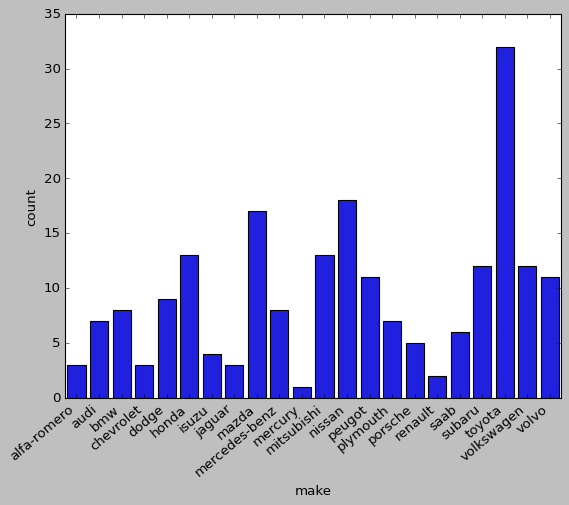

In [163]:
ax = sns.countplot(data = cardf, x= 'make', width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

<Axes: title={'center': 'Fuel type'}, ylabel='percantage'>

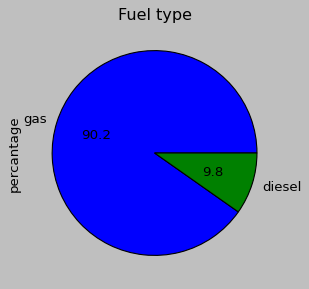

In [186]:
((cardf['fuel_type'].value_counts())/len(cardf['body_style']) *100).plot(kind = 'pie',
                                                                         ylabel = 'percantage',
                                                                         figsize = (6,4),
                                                                         autopct = '%1.1f',
                                                                        title = 'Fuel type')

<Axes: title={'center': 'Frequency of various body styles'}, ylabel='body_style'>

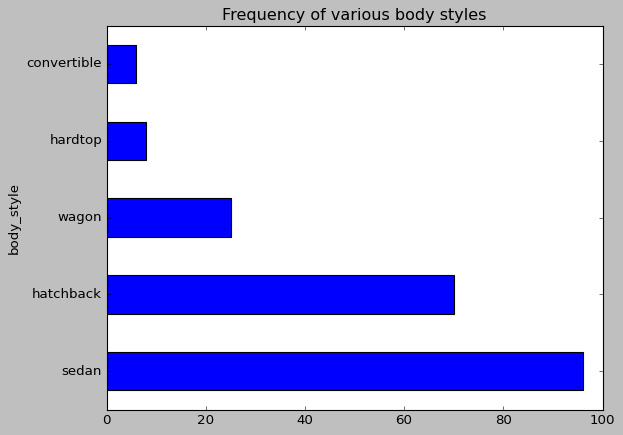

In [187]:
cardf['body_style'].value_counts().plot(kind = 'barh', title = 'Frequency of various body styles')

<Axes: title={'center': 'Distribution of car Length'}, ylabel='Frequency'>

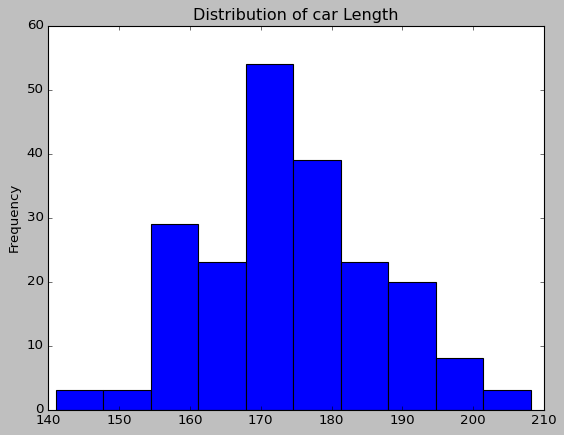

In [188]:
cardf['length'].plot(kind = 'hist', title = 'Distribution of car Length')

<Axes: title={'center': 'Probability density of car length'}, ylabel='Density'>

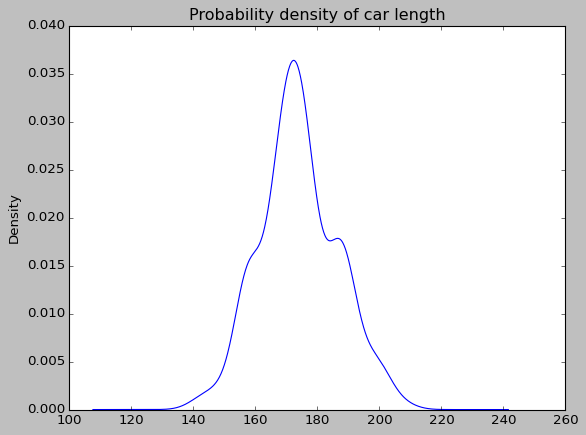

In [189]:
cardf['length'].plot(kind = 'kde', title = 'Probability density of car length')

<Axes: title={'center': 'Histogram of Mileage on Highway'}, xlabel='Highway Mileage (miles per gallon)', ylabel='Frequency'>

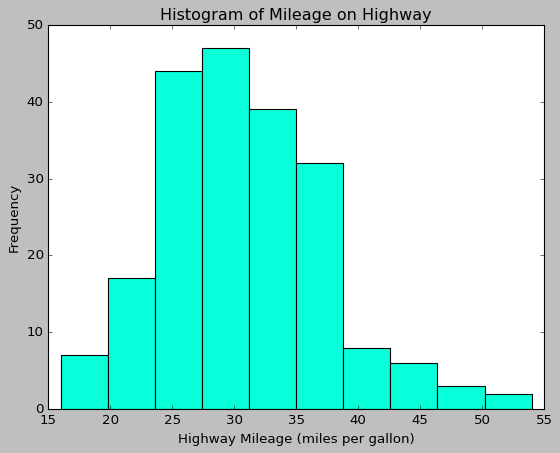

In [194]:
cardf['highway_mpg'].plot(kind = 'hist', xlabel = 'Highway Mileage (miles per gallon)', title = 'Histogram of Mileage on Highway', color = '#08ffda')

In [197]:
plt.style.use('dark_background')

<Axes: title={'center': 'Outliers in highway mileage'}>

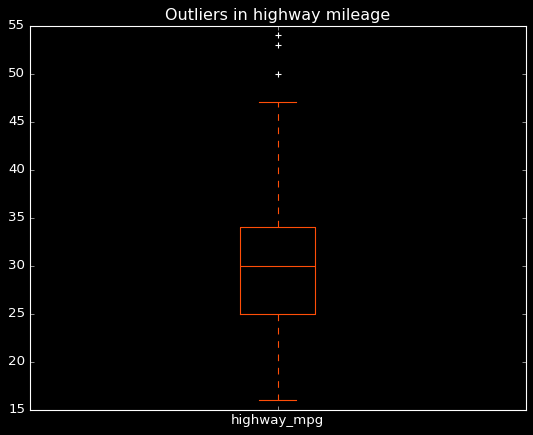

In [200]:
cardf['highway_mpg'].plot(kind='box', title = 'Outliers in highway mileage', color = '#ff4e08')

### Bivariate Analysis

#### Categorical Vs Categorical:

##### 1. Crosstab

In [202]:
pd.crosstab(cardf['make'], cardf['body_style'])

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,2,0,1,0,0
audi,0,0,1,5,1
bmw,0,0,0,8,0
chevrolet,0,0,2,1,0
dodge,0,0,5,3,1
honda,0,0,7,5,1
isuzu,0,0,1,3,0
jaguar,0,0,0,3,0
mazda,0,0,10,7,0


##### 2. Count plot

<Axes: xlabel='body_style', ylabel='count'>

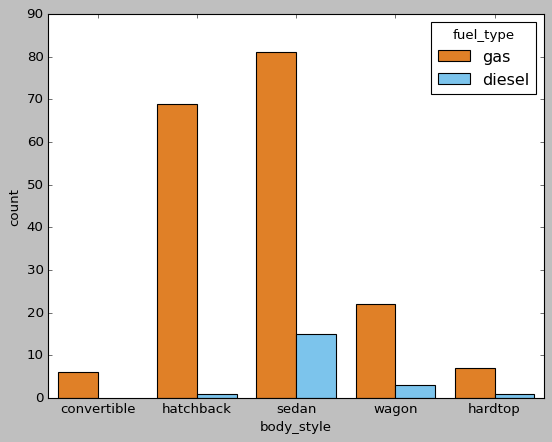

In [205]:
plt.style.use('classic')
sns.countplot(data = cardf, x ='body_style', hue = 'fuel_type', palette=['#ff7f08', '#69caff'])

##### 3. Stacked bar plot

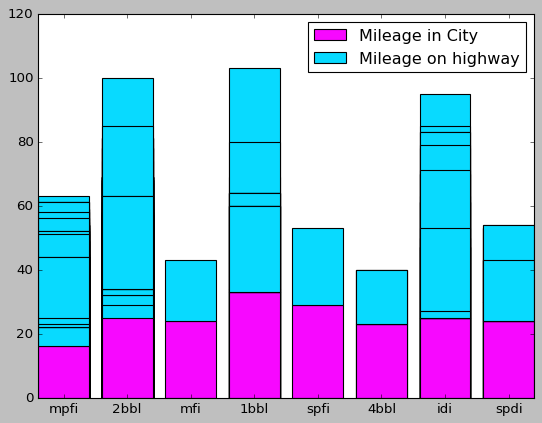

In [215]:
fig, ax = plt.subplots()
ax.bar(cardf['fuel_system'], cardf['highway_mpg'], color = '#f708ff')
ax.bar(cardf['fuel_system'], cardf['city_mpg'], bottom = cardf['highway_mpg'], color = '#08daff')
plt.legend(['Mileage in City', 'Mileage on highway'])
plt.show()

### Categorical Vs Numerical

##### 1. Groupby

In [216]:
cardf.groupby(by = 'engine_type')['price'].mean()

engine_type
dohc     18410.166667
dohcv    33278.000000
l        14715.083333
ohc      11509.304054
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64

##### 2. Pivot Table

In [219]:
cardf.pivot_table(values='length', index = 'body_style', columns = 'drive_wheels', aggfunc='median')

drive_wheels,4wd,fwd,rwd
body_style,,,
convertible,NaN,159.30,168.9
hardtop,NaN,162.40,176.2
hatchback,167.75,159.10,171.2
sedan,172.00,171.70,188.8
wagon,171.65,174.05,190.9


##### 3. Line Chart

In [240]:
plt.style.use('ggplot')

C:\Users\91852\AppData\Local\Temp\ipykernel_5144\1679950894.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


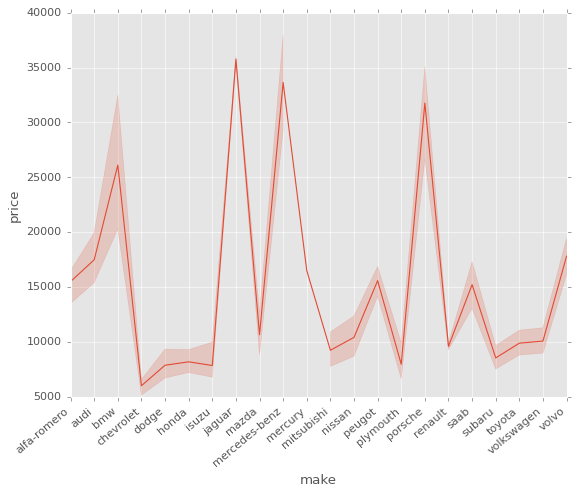

In [241]:
ax = sns.lineplot(data = cardf, x=cardf['make'], y=cardf['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Numerical Vs Numerical

##### 1. Scatter Plot

<Axes: xlabel='engine_size', ylabel='curb_weight'>

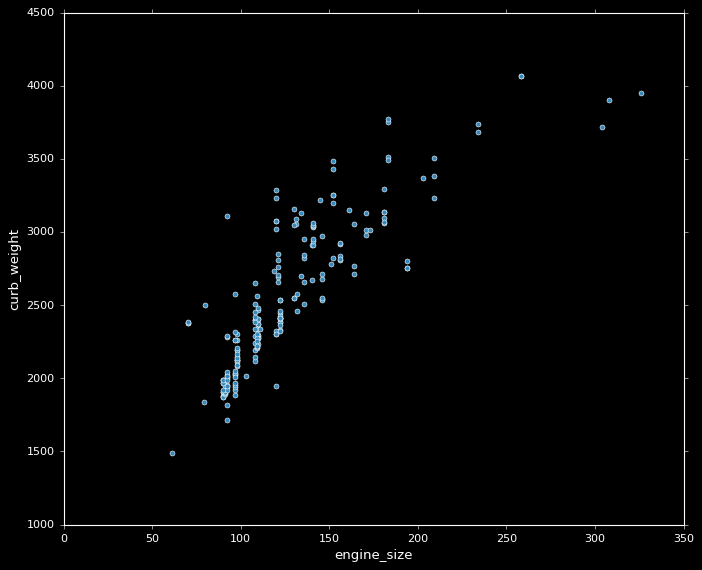

In [248]:
plt.style.use('dark_background')
cardf.plot('engine_size', 'curb_weight', kind = 'scatter', figsize = (10,8), grid = False)

##### 2. Correlation Matrix

In [249]:
cardf.corr(numeric_only=True)

,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
num_of_doors,1.000000,0.450443,0.395114,0.204211,0.544419,0.199279,-0.012526,0.026024,0.146567,-0.116998,-0.237784,-0.028621,-0.052365,0.036375
wheel_base,0.450443,1.000000,0.874820,0.792940,0.594216,0.775307,0.324576,0.551783,0.255988,0.348092,-0.359928,-0.469933,-0.542101,0.567083
length,0.395114,0.874820,1.000000,0.841118,0.491029,0.877728,0.430672,0.682920,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.683961
width,0.204211,0.792940,0.841118,1.000000,0.279210,0.867032,0.545007,0.733872,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.760042
height,0.544419,0.594216,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067997,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.118584
curb_weight,0.199279,0.775307,0.877728,0.867032,0.295572,1.000000,0.609727,0.847806,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.837105
num_of_cylinders,-0.012526,0.324576,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846195,-0.020002,0.691832,-0.124883,-0.445837,-0.466666,0.716846
engine_size,0.026024,0.551783,0.682920,0.733872,0.067997,0.847806,0.846195,1.000000,0.027709,0.808253,-0.244136,-0.651693,-0.674912,0.876146
compression_ratio,0.146567,0.255988,0.158414,0.181129,0.261214,0.151362,-0.020002,0.027709,1.000000,-0.204851,-0.436441,0.324701,0.265201,0.064308
horsepower,-0.116998,0.348092,0.553337,0.641337,-0.109286,0.750927,0.691832,0.808253,-0.204851,1.000000,0.130565,-0.802170,-0.770780,0.810319


##### 3. Heat Map

<Axes: >

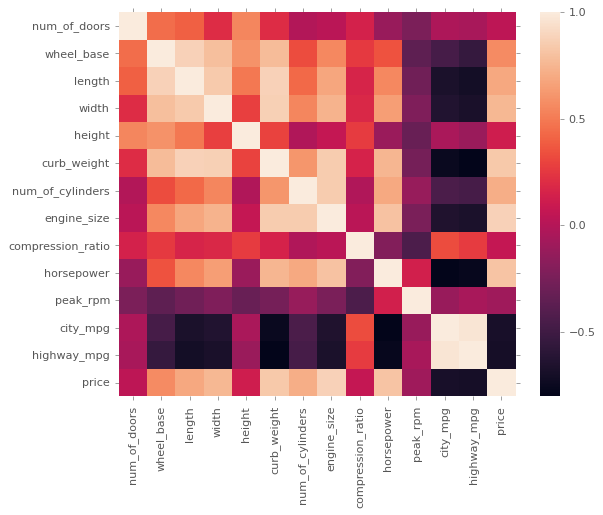

In [252]:
plt.style.use('ggplot')
sns.heatmap(cardf.corr(numeric_only=True))

##### 4. Pair plot

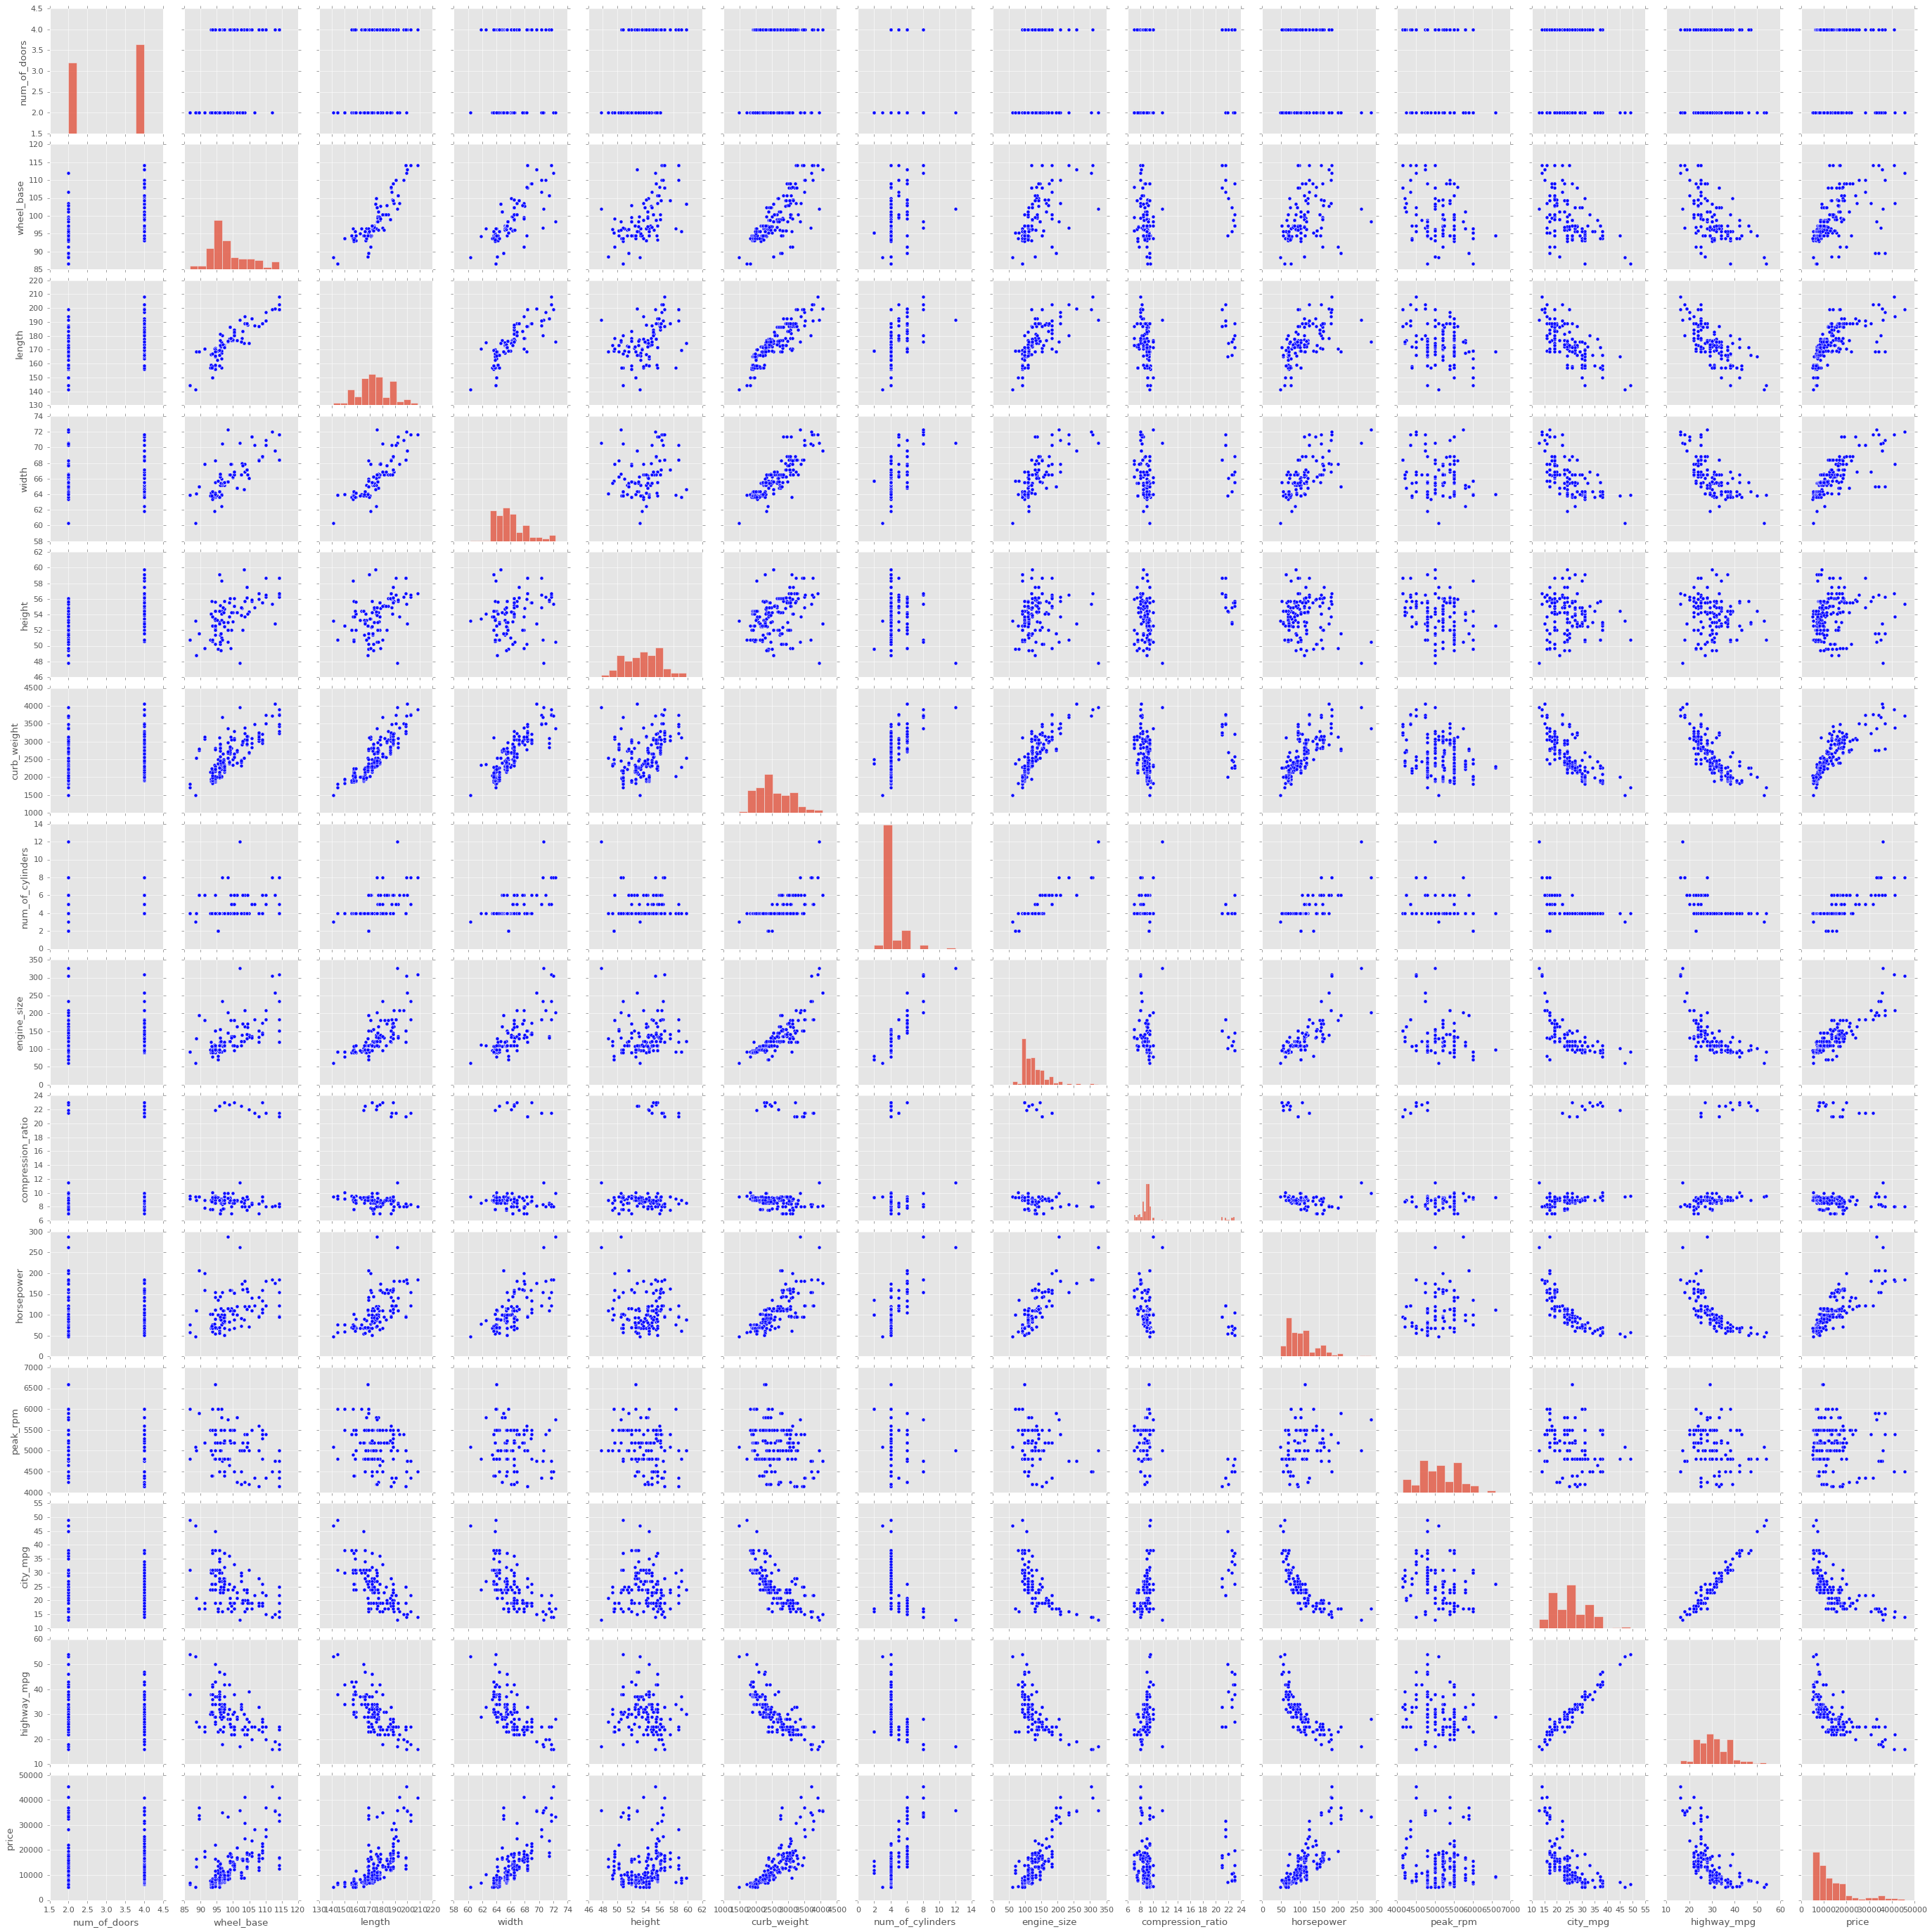

In [253]:
sns.pairplot(cardf)